In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/N100-F1000-S100-R100-result-v13.csv')
df.describe()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
count,2700.0,2700.000000,2.700000e+03,2.700000e+03,2700.000000,2700.000000,2700.000000
mean,-1.0,0.700000,7.991017e+05,4.285100e+05,0.183318,0.072319,498170.823459
std,0.0,0.129123,3.766939e+05,2.041872e+05,0.099395,0.048031,3202.429420
min,-1.0,0.500000,3.396738e+05,1.731369e+05,0.055227,0.012700,490769.486403
25%,-1.0,0.600000,4.916151e+05,2.558408e+05,0.063882,0.015188,496010.962514
50%,-1.0,0.700000,7.009850e+05,3.703219e+05,0.183667,0.070687,497772.717413
75%,-1.0,0.800000,1.032418e+06,5.751188e+05,0.299859,0.125511,500275.707402
max,-1.0,0.900000,1.810368e+06,1.022029e+06,0.320841,0.146103,507182.154191


In [3]:
df.corr()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
correlation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
load,NaN,1.000000e+00,0.963812,0.953953,1.602540e-18,5.907174e-18,1.018645e-18
v1,NaN,9.638124e-01,1.000000,0.994658,3.435881e-02,3.405294e-02,5.413021e-02
v2,NaN,9.539526e-01,0.994658,1.000000,1.272641e-01,1.271115e-01,5.232766e-02
disturbance,NaN,1.602540e-18,0.034359,0.127264,1.000000e+00,9.980324e-01,-5.198266e-03
mean_ca,NaN,5.907174e-18,0.034053,0.127112,9.980324e-01,1.000000e+00,-1.541688e-02
actual_load,NaN,1.018645e-18,0.054130,0.052328,-5.198266e-03,-1.541688e-02,1.000000e+00


In [4]:
df = df.drop('v1', axis=1)

In [5]:
vals = df.drop(['disturbance', 'actual_load', 'mean_ca'], axis=1).groupby(['algorithm', 'correlation', 'load']).median()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load             v2                              
algorithm                               BF             RR           SALP
0                  -1  0.50  188883.904835  202781.658603  179872.514223
1                  -1  0.55  223618.152737  240675.562564  213134.280390
2                  -1  0.60  264133.026529  285140.773039  251980.522368
3                  -1  0.65  311817.986650  338098.366250  297958.950782
4                  -1  0.70  368997.239087  402325.714056  353253.276712

<AxesSubplot:xlabel='load'>

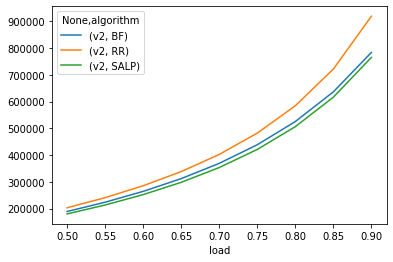

In [8]:
vals.drop('correlation', axis=1).plot(x='load', legend=True)

In [14]:
df.drop(['actual_load', 'correlation', 'load'], axis=1).groupby('algorithm').mean().sort_values('v2')

,v2,disturbance,mean_ca
algorithm,,,
SALP,401938.818379,0.062059,0.014462
BF,418131.775990,0.183074,0.071301
RR,465459.271013,0.304820,0.131193
